In [3]:
import sys
sys.path.insert(0,"/home/apprenant/PycharmProjects/FoodFlix")

import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from src.d01_data.load_data import df_raw as df

In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
251983,3492500026258,http://world-en.openfoodfacts.org/product/3492...,openfoodfacts-contributors,1477902850,2016-10-31T08:34:10Z,1487009996,2017-02-13T18:19:56Z,Panés ou colin d'Alaska,NaN,200g,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
65565,0053136899314,http://world-en.openfoodfacts.org/product/0053...,usda-ndb-import,1489073427,2017-03-09T15:30:27Z,1489073427,2017-03-09T15:30:27Z,"Artisan Virginia Peanuts, Salt & Pepper",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN
65056,0052548581084,http://world-en.openfoodfacts.org/product/0052...,usda-ndb-import,1489071577,2017-03-09T14:59:37Z,1489071577,2017-03-09T14:59:37Z,"Slurpee, Popping Candy, Cola",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN
349768,8718114711775,http://world-en.openfoodfacts.org/product/8718...,andre,1369996443,2013-05-31T10:34:03Z,1501050246,2017-07-26T06:24:06Z,Condiment Balsamique Blanc,Vinaigre Balsamique,25 cl,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN
278108,3770001361031,http://world-en.openfoodfacts.org/product/3770...,openfoodfacts-contributors,1474006269,2016-09-16T06:11:09Z,1474006270,2016-09-16T06:11:10Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(100000, 163)

In [6]:
# drop empty columns
df.dropna(how='all', axis=1, inplace=True)

In [7]:
df.shape

(100000, 141)

In [8]:
#drop empty rows
df.dropna(how='all', axis=0, inplace=True)

In [9]:
df.shape

(100000, 141)

In [10]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',


In [11]:
#i don't keep metadata
df = df.drop(
    columns=['code', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime'])

In [12]:
df.shape

(100000, 135)

In [13]:
# I keep only french values
df["countries"] = df["countries"].apply(
    lambda x: "France" if re.match(r".(fr).", str(x), re.IGNORECASE) else x)
df = df.loc[df.countries == "France"]

In [14]:
df.shape

(29899, 135)

In [15]:
df.countries.unique()

array(['France'], dtype=object)

In [16]:
#i decide to keep only the usefull columns to calcul nutri-score
df_nutri_score = df[
    ['product_name', 'energy_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g',
     'saturated-fat_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr']]

#i don't keep countries columns because there is only french values

list(df_nutri_score.columns)

['product_name',
 'energy_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sodium_100g',
 'saturated-fat_100g',
 'nutrition-score-fr_100g',
 'nutrition_grade_fr']

In [17]:
df_nutri_score.shape

(29899, 9)

In [18]:
#I verify types of data

In [19]:
df_nutri_score.dtypes

product_name                object
energy_100g                float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
sodium_100g                float64
saturated-fat_100g         float64
nutrition-score-fr_100g    float64
nutrition_grade_fr          object
dtype: object

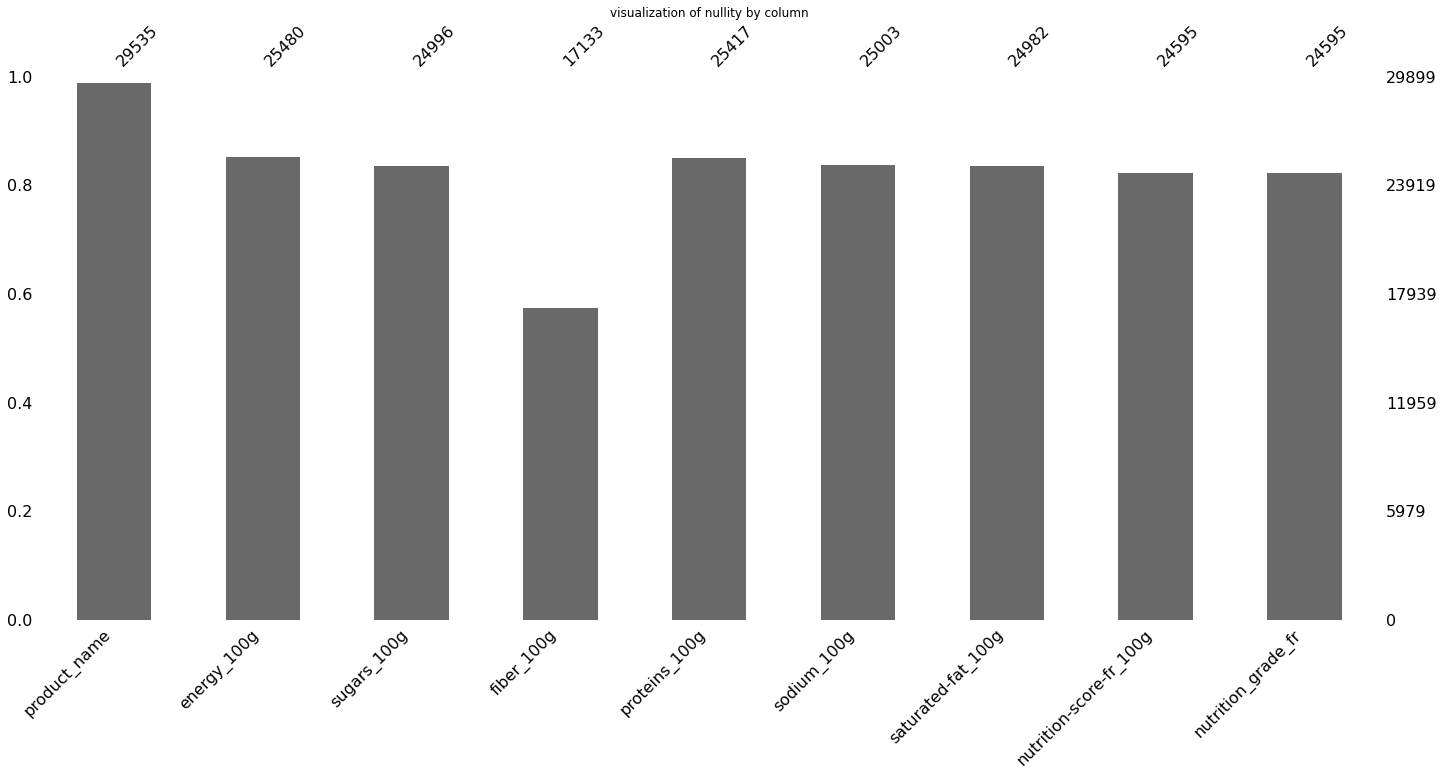

In [20]:
#I look at how many null values rest

msno.bar(df_nutri_score);
plt.title("visualization of nullity by column");


In [21]:
percentage_per_column_missing_value = (df_nutri_score.isnull().sum() * 100) / len(df_nutri_score)
print(percentage_per_column_missing_value)

product_name                1.217432
energy_100g                14.779759
sugars_100g                16.398542
fiber_100g                 42.697080
proteins_100g              14.990468
sodium_100g                16.375130
saturated-fat_100g         16.445366
nutrition-score-fr_100g    17.739724
nutrition_grade_fr         17.739724
dtype: float64


In [22]:
# rows without name don't have to be
df = df_nutri_score[df_nutri_score['product_name'].notna()]
print(df.shape)

(29535, 9)


In [25]:
df.to_csv("../data/02_intermediate/intermediate.csv")